<a href="https://colab.research.google.com/github/gaponniah/MachineLearning/blob/main/bruteeuclid25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Model Performance on Training Data: 0.96

Model Performance on Test Data: 0.93
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



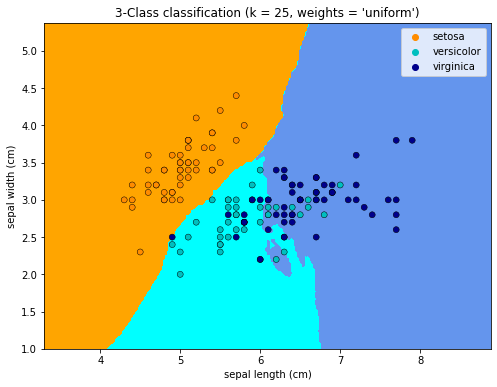

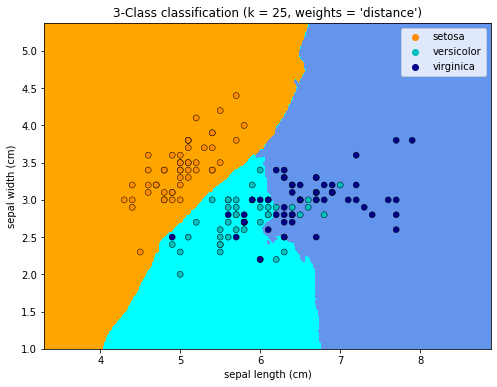

In [1]:
#===================== Install required libraries ======================

# pip install scikit-learn numpy matplotlib pandas


# install required libraries
!pip install scikit-learn numpy matplotlib pandas 

#===================== Import required libraries ======================

# importing required libraries
import pandas as pd
import sklearn.datasets as datasets
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

#========================== Hyperparameters ===========================

# Set Hyperparameters
k = 25
search_algo = 'brute'
dist = 'euclidean'

#============================== Data set ===============================

# Loading iris dataset
data_set = datasets.load_iris()
X = data_set.data
y = data_set.target
feature_names = data_set.feature_names
classes = data_set.target_names

# Splitting the data into training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size = 0.2, 
                                    stratify=y, 
                                    random_state=42)


#============================== Training ===============================

# Train k-Nearest Neighbor Model
model = KNeighborsClassifier(n_neighbors=k, algorithm=search_algo, 
                                metric=dist)
model.fit(X_train, y_train)

#============================== Testing ===============================

# Testing model on train data

# get the prediction labels of the training data
cross_validation = cross_val_score(model, X_train, y_train, cv=5)

# evaluate and print the results
print("\nModel Performance on Training Data: {}".format(
    np.mean(cross_validation).round(2)))

# Testing model on test data

# get the prediction labels of the test data
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)

print("\nModel Performance on Test Data: {}".format(
    accuracy.round(2)))

# Generate text reprot showing the main classification metrics
report = classification_report(y_test, y_pred)
print(report)

#=========================== Visualization ============================
from matplotlib.colors import ListedColormap
import seaborn as sns
n_neighbors = k
# we only take the first two features - why?
X = data_set.data[:, :2]
y = data_set.target

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=data_set.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )
    plt.xlabel(data_set.feature_names[0])
    plt.ylabel(data_set.feature_names[1])

plt.show()